In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import date
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import colors

### Create regression data

In [2]:
tfidf_path = '../../data/tfidf_merged_chs_1000/'

In [3]:
lda_path = '../../data/lda_merged_chs/'

In [4]:
# fandom_list = [
#  'star_wars_all_media_types',
#  'arthurian_mythology_&_related_fandoms',
#  'haikyuu',
#  'kuroko_no_basuke',
#  'hamilton_miranda',
#  'the_walking_dead_&_related_fandoms',
#  'buffy_the_vampire_slayer',
#  'les_miserables_all_media_types',
#  'naruto',
#  'shakespare_william_works',
#  'bishoujo_senshi_sailor_moon',
#  'sherlock_holmes_&_related_fandoms']

In [5]:
fandom_list = ['harry_potter',
 'dcu',
 'doctor_who_&_related_fandoms',
 'star_wars_all_media_types',
 'arthurian_mythology_&_related_fandoms',
 'supernatural',
 'haikyuu',
 'kuroko_no_basuke',
 'hamilton_miranda',
 'dragon_age_all_media_types',
 'the_walking_dead_&_related_fandoms',
 'buffy_the_vampire_slayer',
 'les_miserables_all_media_types',
 'naruto',
 'tolkien_j_r_r_works_&_related_fandoms',
 'shakespare_william_works',
 'hetalia_axis_powers',
 'attack_on_titan',
 'ms_paint_adventures',
 'marvel',
 'bishoujo_senshi_sailor_moon',
 'one_direction',
 'sherlock_holmes_&_related_fandoms']

In [6]:
def first_rel(field):
    try:
        return field.split(',')[0]
    except:
        return field

In [7]:
def find_major_rel(df):
    df['Relationship'] = df.apply(lambda row: first_rel(row['Relationship']), axis=1)
    counts = df['Relationship'].value_counts()
    return counts.keys()[0:5]


In [32]:
df_all = []
for i,fandom in enumerate(fandom_list):
    df_tfidf = pd.read_csv(os.path.join(tfidf_path,fandom + '_temporal_tfidf_cos_merged_chapters_1000.tsv'), sep = '\t')
    del df_tfidf['index']
    df_lda = pd.read_csv(os.path.join(lda_path,fandom + '_temporal_lda_jsd_toprev_with_dist_merged_chs.tsv'), sep = '\t',  quotechar=None, quoting=3)
    del df_lda['index']
    del df_lda['Text']
    del df_lda['Dist']
    del df_lda['Chapters']
    print(len(df_tfidf), len(df_lda))
#     print(df_tfidf.dtypes)
#     print()
#     print(df_lda.dtypes)
#     print('-----')
#     print()
    #     for col in df_lda.columns.values:
#         print(df_lda[col].tolist()[0:100])
    df_lda['UpdateDate'] = df_lda['UpdateDate'].astype('object')
    df = pd.merge(df_tfidf, df_lda, on=['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks', 'Category',\
  'Characters','Comments' ,'CompleteDate',\
 'Fandoms', 'Hits' ,'Kudos', 'Language' ,'PublishDate' ,'Rating',\
 'Relationship','Title'  ,'UpdateDate' ,'Words'], how='inner')

    df['fandom_category'] = fandom    

    df = df.replace([np.inf, -np.inf], np.nan)
    df['Hits'].fillna(0, inplace=True)
    df['Kudos'].fillna(0, inplace=True)
    df['Bookmarks'].fillna(0, inplace=True)
    df['Comments'].fillna(0, inplace=True)

    freq_rel = find_major_rel(df)
    df['Relationship'] = df['Relationship'].apply(lambda x: first_rel(x))
    df['Freq_relationship'] = df['Relationship'].apply(lambda x: 1 if x in freq_rel else 0)
    del df['Relationship']
    df_all.append(df)

32347 1432
21572 9487
16211 9641
11428 9734
11173 9780
62759 14
12880 9421
6632 6633
936 937
20268 3
4912 4984
5366 5406
8636 8639
5612 5846
13585 9717
244 651
9299 9416
16841 9346
19894 9938
90494 17
216 491
14869 9931
42406 9928


In [30]:
df_all = pd.concat(df_all)

In [31]:
len(df_all)

134508

In [27]:
len(df_all.drop_duplicates())

134508

In [26]:
df_all.head()

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,Kudos,...,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,Cos,JSD,fandom_category,Freq_relationship
0,"Amnesia, Temporary Amnesia, Spells & Enchantme...",No Archive Warnings Apply,EntreNous,14,M/M,2,"Ron Weasley, Draco Malfoy, Harry Potter, Hermi...",['Harry Potter - Fandom'],1635.0,115.0,...,15774.0,2009-07-07,NaN,2009-07-07,4,http://archiveofourown.org/works/967862/chapte...,0.731472,0.265533,harry_potter,0
1,"Angst, Canonical Character Death, Community: c...",Major Character Death,amorremanet,2,M/M,1,"Cedric Diggory, Edward Cullen","['Harry Potter - J. K. Rowling', 'Twilight Ser...",569.0,19.0,...,827.0,2009-07-15,NaN,2009-07-15,0,http://archiveofourown.org/works/386732,0.679330,0.451447,harry_potter,0
2,"Birthday, Birthday Presents, Post-Canon, Cross...",No Archive Warnings Apply,mayachain,0,M/M,1,"Neville Longbottom, Draco Malfoy, Severus Snap...",['Harry Potter - J. K. Rowling'],256.0,5.0,...,576.0,2009-07-30,NaN,2009-07-30,0,http://archiveofourown.org/works/150355,0.405857,0.679366,harry_potter,0
3,"Comment Fic, Porn, Dancing, Cheating, Threesom...",No Archive Warnings Apply,ChokolatteJedi,0,M/MOther,1,"Sirius Black, James Potter, Original Character...",['Harry Potter - J. K. Rowling'],303.0,4.0,...,585.0,2009-07-10,NaN,2009-07-10,0,http://archiveofourown.org/works/459013?view_a...,0.864296,0.556468,harry_potter,0
4,"Dark, Slavery, Master/Slave, One Shot, Post-War","Creator Chose Not To Use Archive Warnings, Gra...",Swankyo0,2,M/M,1,"Severus Snape, Harry Potter, Voldemort, Albus ...",['Harry Potter - Rowling'],2866.0,35.0,...,529.0,2009-07-19,NaN,2009-07-19,2,http://archiveofourown.org/works/106601?view_a...,0.914713,0.594772,harry_potter,1


In [77]:
len(set(df_all.Author.tolist()))

23952

In [78]:
len(df_all[df_all.Kudos == 0])

0

In [79]:
del df_all['Language']
del df_all['Title']
del df_all['AdditionalTags']
del df_all['Fandoms']
del df_all['Characters']

In [80]:
len(df_all)

71215

In [81]:
df_all['Category'].fillna('Unknown', inplace=True)
df_all['Category_F_F'] = df_all['Category'].apply(lambda x: 1 if 'F/F' in x else 0)
df_all['Category_F_M'] = df_all['Category'].apply(lambda x: 1 if 'F/M' in x else 0)
df_all['Category_Gen'] = df_all['Category'].apply(lambda x: 1 if 'Gen' in x else 0)
df_all['Category_M_M'] = df_all['Category'].apply(lambda x: 1 if 'M/M' in x else 0)
df_all['Category_Multi'] = df_all['Category'].apply(lambda x: 1 if 'Multi' in x else 0)
df_all['Category_Other'] = df_all['Category'].apply(lambda x: 1 if 'Other' in x else 0)
df_all['Category_Unknown'] = df_all['Category'].apply(lambda x: 1 if 'Unknown' in x else 0)
del df_all['Category']

In [82]:
df_all['ArchiveWarnings_underage'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Underage' in x else 0)
df_all['ArchiveWarnings_death'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Major Character Death' in x else 0)
df_all['ArchiveWarnings_choose_no'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Creator Chose Not To Use Archive Warnings' in x else 0)
df_all['ArchiveWarnings_no_apply'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'No Archive Warnings Apply' in x else 0)
df_all['ArchiveWarnings_violence'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Graphic Depictions Of Violence' in x else 0)
df_all['ArchiveWarnings_noncon'] = df_all['ArchiveWarnings'].apply(lambda x: 1 if 'Rape/Non-Con' in x else 0)

del df_all['ArchiveWarnings']

In [83]:
# df_all = df_all[df_all['ArchiveWarnings_blood'] != 1]
# df_all = df_all[df_all['ArchiveWarnings_none'] != 1]

In [84]:
df_all['Author'].fillna('Unknown', inplace=True)
counts = df_all['Author'].value_counts()
idx = counts[counts >= 10].index
df_all['author_fic_cnt'] = df_all['Author'].apply(lambda x: counts[x])
del df_all['Author']

In [85]:
df_all['Rating_E'] = df_all['Rating'].apply(lambda x: 1 if x == 'Explicit' else 0)
df_all['Rating_G'] = df_all['Rating'].apply(lambda x: 1 if x == 'General Audiences' else 0)
df_all['Rating_M'] = df_all['Rating'].apply(lambda x: 1 if x == 'Mature' else 0)
df_all['Rating_N'] = df_all['Rating'].apply(lambda x: 1 if x == 'Not Rated' else 0)
df_all['Rating_T'] = df_all['Rating'].apply(lambda x: 1 if x == 'Teen And Up Audiences' else 0)
del df_all['Rating']

In [86]:
df_all['Fandom_harry_potter'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'harry_potter' else 0)
df_all['Fandom_dcu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dcu' else 0)
df_all['Fandom_doctor_who'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'doctor_who_&_related_fandoms' else 0)
df_all['Fandom_star_wars'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'star_wars_all_media_types' else 0)
df_all['Fandom_arthurian'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'arthurian_mythology_&_related_fandoms' else 0)
df_all['Fandom_supernatural'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'supernatural' else 0)
df_all['Fandom_haikyuu'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'haikyuu' else 0)
df_all['Fandom_kuroko_no_basuke'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'kuroko_no_basuke' else 0)
df_all['Fandom_hamilton_miranda'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hamilton_miranda' else 0)
df_all['Fandom_dragon_age'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'dragon_age_all_media_types' else 0)
df_all['Fandom_the_walking_dead'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'the_walking_dead_&_related_fandoms' else 0)
df_all['Fandom_buffy'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'buffy_the_vampire_slayer' else 0)
df_all['Fandom_les_miserables'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'les_miserables_all_media_types' else 0)
df_all['Fandom_naruto'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'naruto' else 0)
df_all['Fandom_tolkien'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'tolkien_j_r_r_works_&_related_fandoms' else 0)
df_all['Fandom_shakespare'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'shakespare_william_works' else 0)
df_all['Fandom_hetalia'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'hetalia_axis_powers' else 0)
df_all['Fandom_attack_on_titan'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'attack_on_titan' else 0)
df_all['Fandom_ms_paint_adventures'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'ms_paint_adventures' else 0)
df_all['Fandom_marvel'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'marvel' else 0)
df_all['Fandom_sailor_moon'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'bishoujo_senshi_sailor_moon' else 0)
df_all['Fandom_one_direction'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'one_direction' else 0)
df_all['Fandom_sherlock'] = df_all['fandom_category'].apply(lambda x: 1 if x == 'sherlock_holmes_&_related_fandoms' else 0)

del df_all['fandom_category']

In [87]:
def date_today(cell):
    try:
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days
    except:
        return float('nan')

In [88]:
df_all['PublishDate'] = df_all.apply(lambda row: date_today(row['PublishDate']), axis = 1)
df_all['CompleteDate'] = df_all.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
df_all['UpdateDate'] = df_all.apply(lambda row: date_today(row['UpdateDate']), axis = 1)

In [89]:
def find_history(field_list):
    field_list = [10000000 if np.isnan(x) else x for x in field_list]
    return np.amin(field_list)

In [90]:
df_all['history'] = df_all.apply(lambda row: find_history([row['PublishDate'], row['CompleteDate'], row['UpdateDate']]), axis=1)

In [91]:
del df_all['PublishDate']
del df_all['CompleteDate']
del df_all['UpdateDate']

In [92]:
len(df_all)

71215

In [93]:
# df_t = df_all.sample(100)
# for col in df_t.columns.values:
#     print(col)
#     print(df_t[col].tolist())
#     print()

In [94]:
# df1 = df_all[df_all.isnull().any(axis=1)]

In [95]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'URL', 'Cos', 'Text', 'Dist', 'JSD', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_advent

In [96]:
df_all = df_all.rename(columns = {'history':'History', 'Cos': 'Term_novelty', 'JSD': 'Topic_novelty'})

In [97]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,URL,Term_novelty,Text,Dist,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
0,1,5,2091.0,41.0,3004.0,2,http://archiveofourown.org/works/663208/chapte...,0.289051,"\nStar WarsReign of the ConfederacyFinally, af...","[1.6693486e-05, 1.6693486e-05, 1.6693486e-05, ...",...,0,0,0,0,0,0,0,0,0,2444.0
1,3,1,209.0,10.0,604.0,2,http://archiveofourown.org/works/661056,0.903670,\nObi Wan is almost more surprised than the re...,"[7.702042e-05, 7.702042e-05, 7.702042e-05, 7.7...",...,0,0,0,0,0,0,0,0,0,2445.0
2,2,1,302.0,4.0,1655.0,0,http://archiveofourown.org/works/656422,0.202239,\nTitle: Jagged HeartsAuthor: bactaqueenRating...,"[2.707458e-05, 2.707458e-05, 2.707458e-05, 2.7...",...,0,0,0,0,0,0,0,0,0,2448.0
3,6,16,399.0,13.0,57542.0,5,http://archiveofourown.org/works/657632/chapte...,0.900934,Title: Changing Course: Chapter OneAuthor: bac...,"[8.5000823e-07, 8.5000823e-07, 8.5000823e-07, ...",...,0,0,0,0,0,0,0,0,0,2446.0
4,79,1,9347.0,363.0,8515.0,19,http://archiveofourown.org/works/648409?view_a...,0.255760,"\nThey were fighting.\nHarsh and violent, they...","[5.481338e-06, 5.481338e-06, 5.481338e-06, 5.4...",...,0,0,0,0,0,0,0,0,0,2453.0


In [98]:
df_all.to_csv('fanfic_regression_data_merged_chs.tsv', sep = '\t', index=False)

### Correlations

In [2]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [4]:
df_all.sort_values('Topic_novelty').head()

,Bookmarks,ChapterIndex,Chapters,Comments,Hits,Kudos,Words,Term_novelty,Topic_novelty,Freq_relationship,...,Fandom_tolkien,Fandom_shakespare,Fandom_hetalia,Fandom_attack_on_titan,Fandom_ms_paint_adventures,Fandom_marvel,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History
529468,0.090909,2.0,11,0,43.090909,1.545455,2260.000000,0.130726,0.283406,0,...,0,0,0,0,0,0,0,1,0,1451.0
528496,0.333333,3.0,3,4,645.000000,8.000000,1267.333333,0.458147,0.307730,0,...,0,0,0,0,0,0,1,0,0,1518.0
2134,6.000000,0.0,1,1,1022.000000,49.000000,1535.000000,0.360937,0.308467,0,...,0,0,0,0,0,0,0,0,0,4356.0
121964,0.000000,1.0,2,0,275.500000,0.500000,1687.500000,0.918170,0.324476,1,...,0,0,0,0,0,0,0,0,0,1438.0
135244,0.000000,0.0,1,0,260.000000,8.000000,1399.000000,0.338412,0.327295,1,...,0,0,0,0,0,0,0,0,0,3118.0


In [47]:
df_all = df_all.rename(columns = {'History': 'Age', 'author_fic_cnt':'Author fiction count',\
                                  'Term_novelty': 'Term novelty', 'Topic_novelty':'Topic novelty'})

In [48]:
term_ave = np.average(df_all['Term novelty'])
topic_ave = np.average(df_all['Topic novelty'])
df_all['Term novelty cent'] = df_all['Term novelty'] - term_ave
df_all['Topic novelty cent'] = df_all['Topic novelty'] - topic_ave
df_all['Term novelty squared'] = np.square(df_all['Term novelty cent'])
df_all['Topic novelty squared'] = np.square(df_all['Topic novelty cent'])

In [49]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Words', 'Term novelty', 'Topic novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Author fiction count', 'Rating_E',
       'Rating_G', 'Rating_M', 'Rating_N', 'Rating_T',
       'Fandom_harry_potter', 'Fandom_dcu', 'Fandom_doctor_who',
       'Fandom_star_wars', 'Fandom_arthurian', 'Fandom_supernatural',
       'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
     

In [50]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Words', 'Author fiction count', 'Term novelty', 'Topic novelty', 'Term novelty squared', 'Topic novelty squared','Age']].corr()

In [51]:
# corr = df_all[['Chapters',
#        'Term novelty', 'Topic novelty', 'Freq_relationship',
#        'Category_F_M', 'Category_Gen', 'Category_M_M', 'Category_Multi',
#        'Category_Other', 'Category_Unknown', 'ArchiveWarnings_underage',
#        'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
#        'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
#        'ArchiveWarnings_noncon', 'Author fiction count', 'Rating_E', 'Rating_G',
#        'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'Age', 'Words']].corr()

In [52]:
w,v = np.linalg.eig(corr)  

In [53]:
for idx, item in enumerate(corr.columns.values):
    print(item, np.sqrt(max(w)/w[idx]))


Kudos 1.0
Bookmarks 4.985229899964771
Comments 1.3223005213364276
Hits 2.9384801284273383
Chapters 2.5987436010938167
Words 2.0818021641709654
Author fiction count 1.5017819207018503
Term novelty 1.8572483887535507
Topic novelty 1.7986928884148377
Term novelty squared 1.7247683792463417
Topic novelty squared 1.6512969624815128
Age 1.6754731993262393


In [54]:
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=True)

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


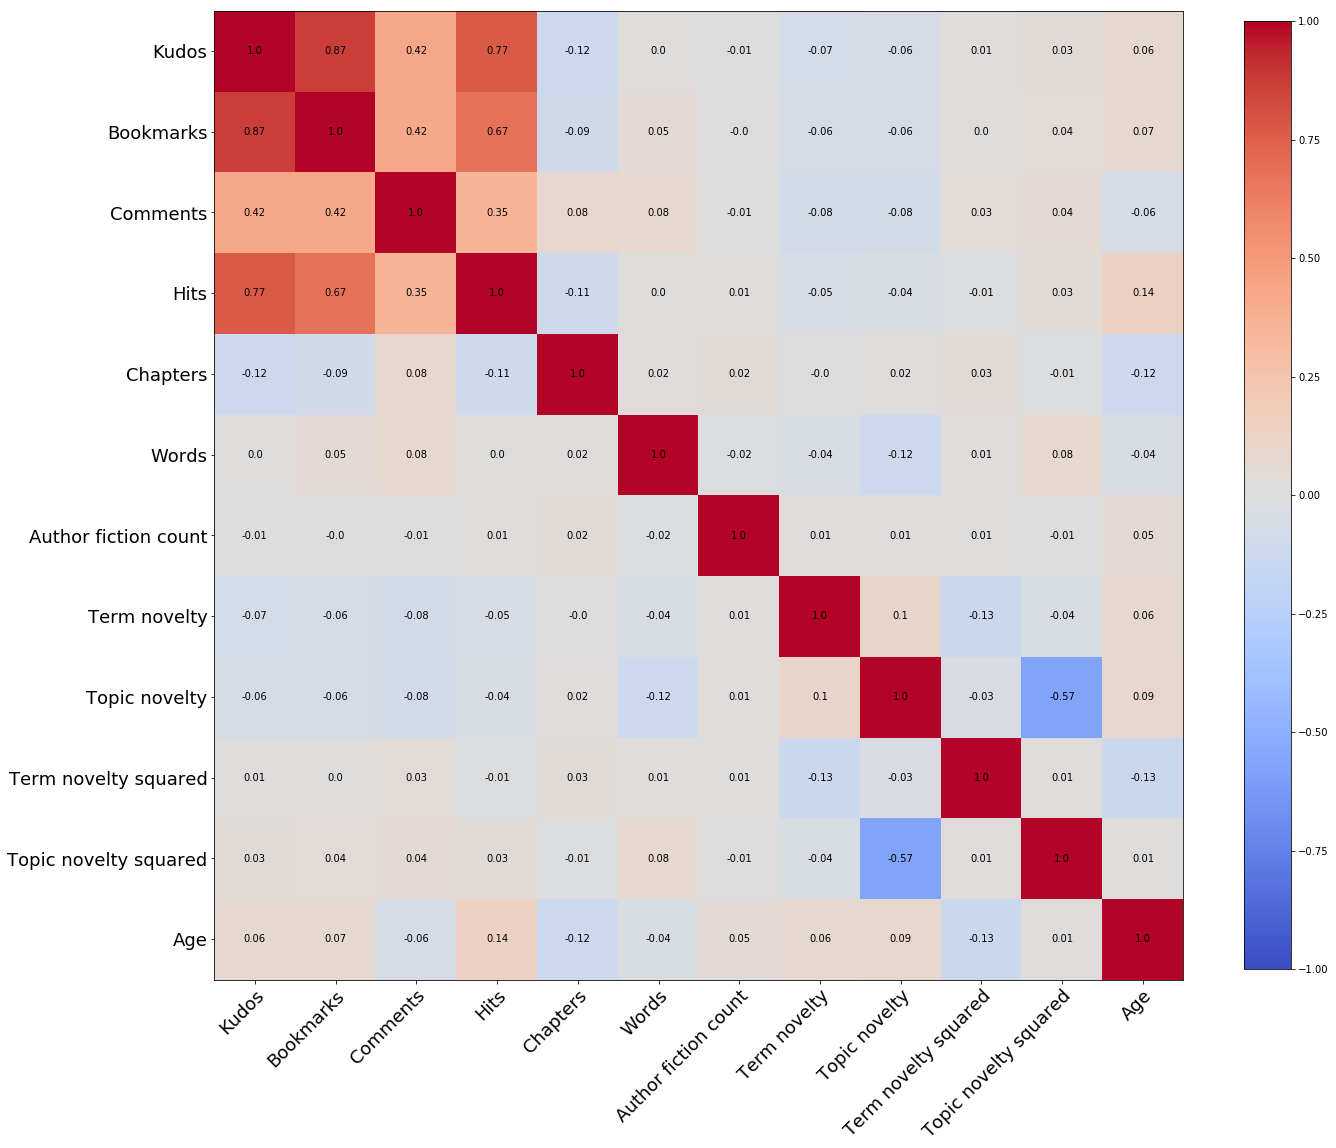

In [55]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (20,20))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='18')

plt.setp(ax.get_yticklabels(), fontsize='18')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.as_matrix()[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
# plt.savefig('variables_corr.pdf', format='pdf')

In [56]:
np.quantile(sorted(df_all['Term novelty'].tolist()), [0, 0.25, 0.5, 0.75])

array([0.05655838, 0.26859697, 0.56553247, 0.83976825])

In [60]:
df_t = df_all[df_all['Term novelty'] < 0.268]

In [61]:
corr = df_t[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Words', 'Author fiction count', 'Term novelty', 'Topic novelty', 'Term novelty squared', 'Topic novelty squared','Age']].corr()

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


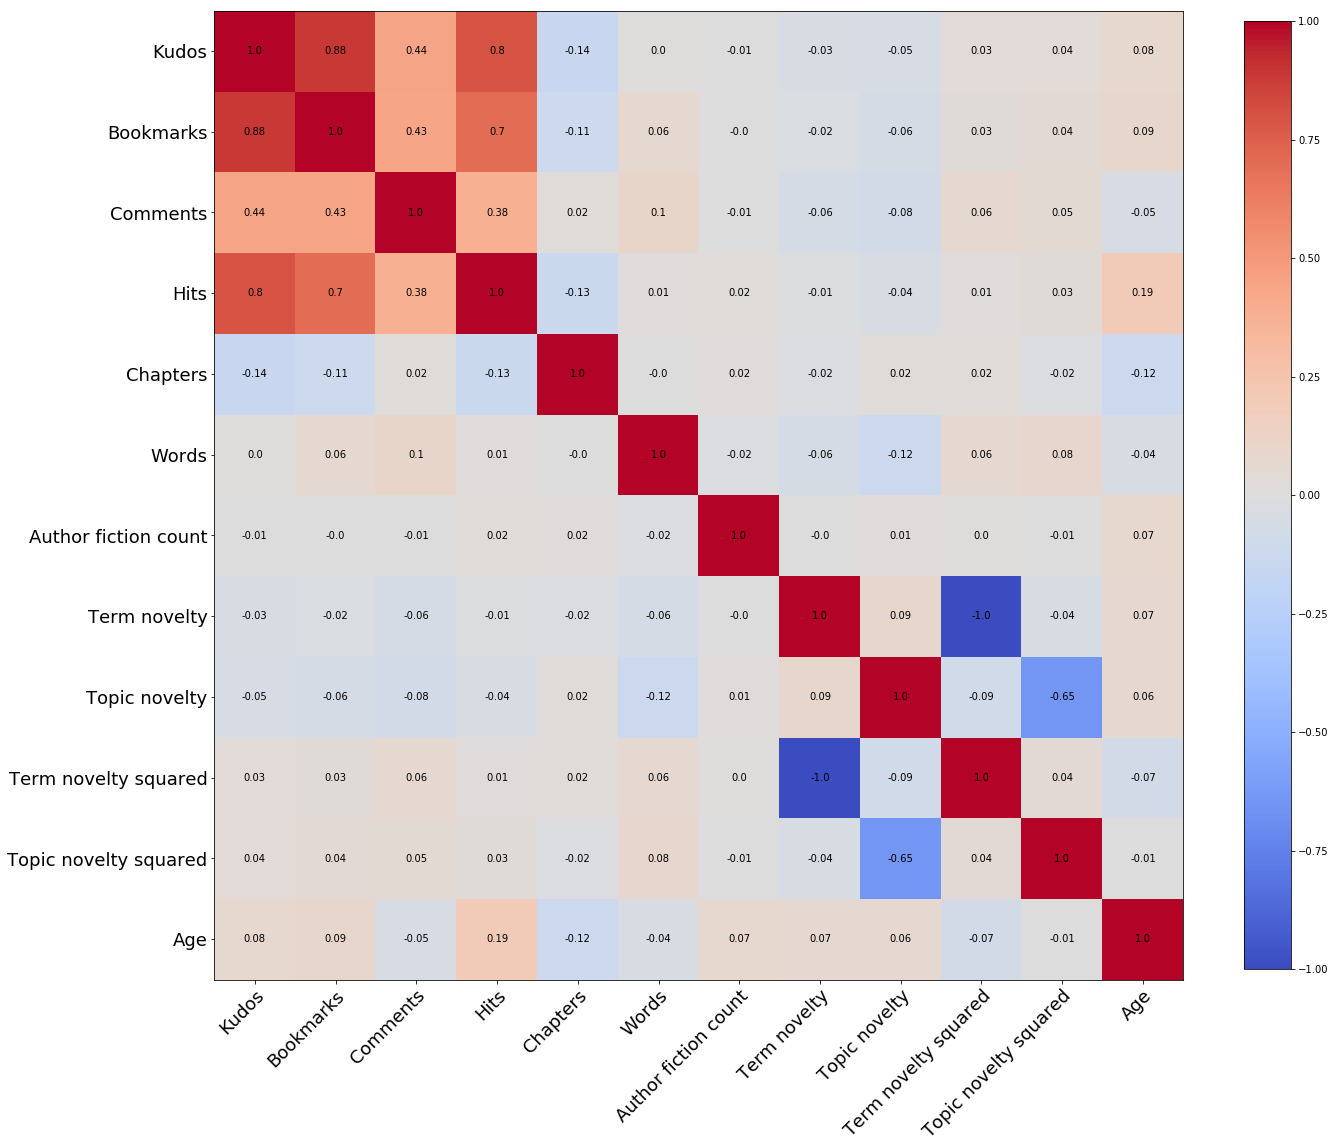

In [62]:
labels = corr.columns.values
fig, ax = plt.subplots(figsize = (20,20))

# kmin = np.amin(corr.as_matrix())
# kmax = np.amax(corr.as_matrix())

norm = colors.Normalize(vmin = -1, vmax = 1)
im = ax.imshow(corr, norm=norm,cmap='coolwarm')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor", fontsize='18')

plt.setp(ax.get_yticklabels(), fontsize='18')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, round(corr.as_matrix()[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("")
fig.colorbar(im, shrink=0.7)
fig.tight_layout()
# plt.savefig('variables_corr.pdf', format='pdf')